# Analysis of Grocery Expense of a Household in Bangladesh Using Regression Analysis

# Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

# Loading the dataset

In [2]:
dataset = pd.read_csv('Grocery Expense Dataset.csv')

In [3]:
dataset.head()

,Family_Member_Number,budget,Menu,time,estimated_money
0,1,49.66,salad,day,49.660
1,2,59.46,"potato, chicken",day,29.730
2,1,23.75,salad,day,23.750
3,1,90.97,chicken,month,90.970
4,2,73.57,"potato, salad",week,36.785


# Handling missing values 

In [4]:
dataset.dropna(inplace=True)

# Encoding categorical variables (Menu and time)

In [5]:
encoder = LabelEncoder()
dataset['Menu'] = encoder.fit_transform(dataset['Menu'])
dataset['time'] = encoder.fit_transform(dataset['time'])

# Spliting the data into features (X) and target (y)

In [6]:
X = dataset.drop(['estimated_money'], axis=1)
y = dataset[['estimated_money']]

# Standardized the features

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Spliting the data into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Creating the SVR model

In [9]:
svr = SVR(kernel='linear')

# Creating a MultiOutputRegressor for SVR

In [10]:
svr_reg = MultiOutputRegressor(svr).fit(X_train, y_train)

# Evaluating the SVR model

In [11]:
svr_r2 = r2_score(y_test, svr_reg.predict(X_test))
svr_mae = mean_absolute_error(y_test, svr_reg.predict(X_test))
svr_rmse = mean_squared_error(y_test, svr_reg.predict(X_test), squared=False)

# Creating the Gradient Boosting Regression model

In [12]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Creating a MultiOutputRegressor for Gradient Boosting

In [13]:
gb_reg = MultiOutputRegressor(gb_regressor).fit(X_train, y_train)

# Evaluating the Gradient Boosting Regression model

In [14]:
gb_r2 = r2_score(y_test, gb_reg.predict(X_test))
gb_mae = mean_absolute_error(y_test, gb_reg.predict(X_test))
gb_rmse = mean_squared_error(y_test, gb_reg.predict(X_test), squared=False)

In [15]:
# Printing the evaluation metrics for SVR and Gradient Boosting

In [16]:
print(f'SVR R2 score: {svr_r2:.4f}, MAE: {svr_mae:.4f}, RMSE: {svr_rmse:.4f}')
print(f'Gradient Boosting R2 score: {gb_r2:.4f}, MAE: {gb_mae:.4f}, RMSE: {gb_rmse:.4f}')

SVR R2 score: 0.7126, MAE: 5.8386, RMSE: 10.1084
Gradient Boosting R2 score: 0.9953, MAE: 1.0173, RMSE: 1.2874


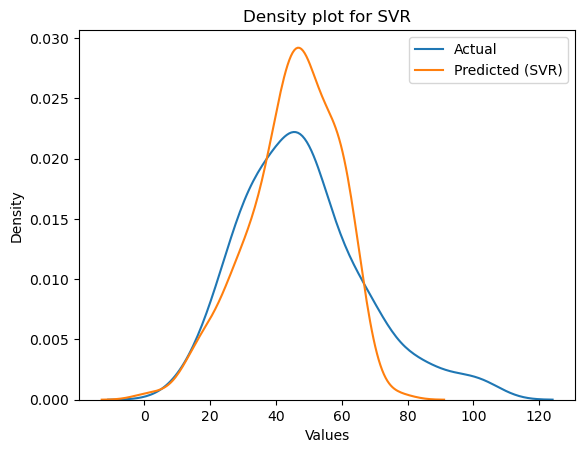

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting values for the test set using SVR
svr_predictions = svr_reg.predict(X_test)

# Densiting plot for SVR
sns.kdeplot(y_test.iloc[:, 0], label='Actual')
sns.kdeplot(svr_predictions[:, 0], label='Predicted (SVR)')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density plot for SVR')
plt.legend()
plt.show()


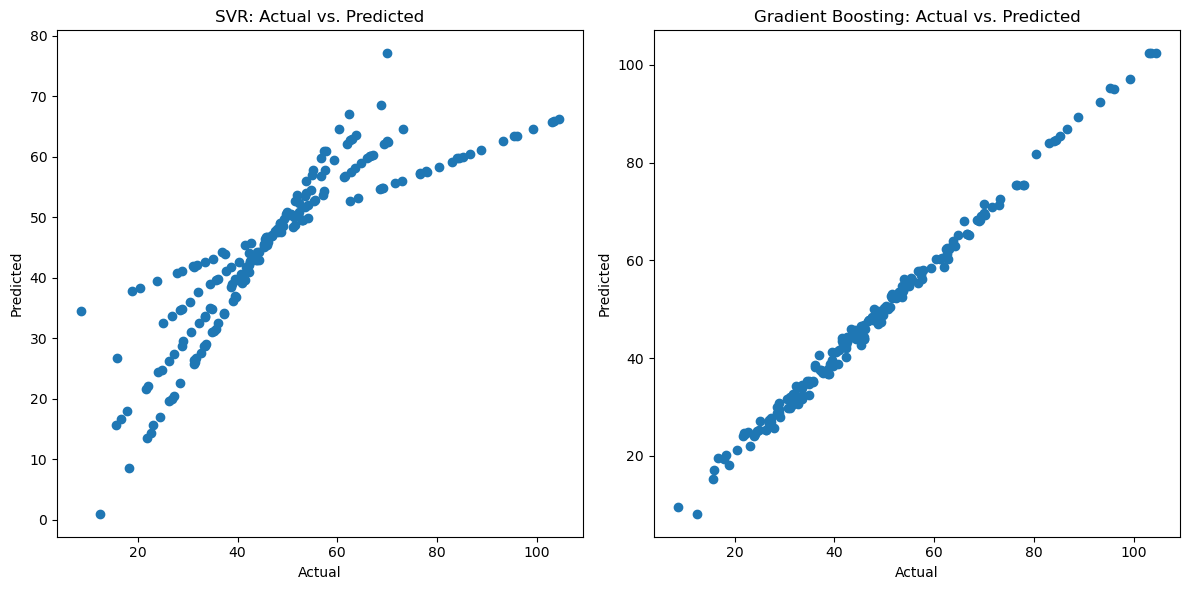

In [18]:
import matplotlib.pyplot as plt

# Predicting the values for the test set
svr_predictions = svr_reg.predict(X_test)
gb_predictions = gb_reg.predict(X_test)

# Creating scatter plots for SVR
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, svr_predictions)
plt.title('SVR: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Creating scatter plots for Gradient Boosting
plt.subplot(1, 2, 2)
plt.scatter(y_test, gb_predictions)
plt.title('Gradient Boosting: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()
